# Desicion Tree

In [4]:
import pandas as pd

red_wine = pd.read_csv('data/winequality-red.csv', sep=';')
white_wine = pd.read_csv('data/winequality-white.csv', sep=';')

red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
red_wine = red_wine[['alcohol', 'residual sugar', 'pH']]
red_wine['class'] = 0
red_wine.rename(columns={'residual sugar' : 'sugar'}, inplace=True)

white_wine = white_wine[['alcohol', 'residual sugar', 'pH']]
white_wine['class'] = 1
white_wine.rename(columns={'residual sugar' : 'sugar'}, inplace=True)

In [6]:
wine = pd.concat([red_wine, white_wine])

In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 253.8 KB


In [8]:
data = wine[['alcohol', 'sugar', 'pH']]
target = wine[['class']]

In [9]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target =\
train_test_split(data, target)

In [10]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))


0.7764778325123153
0.7932307692307692


C:\Users\1-20\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=14)

dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.9739326765188834
0.8615384615384616


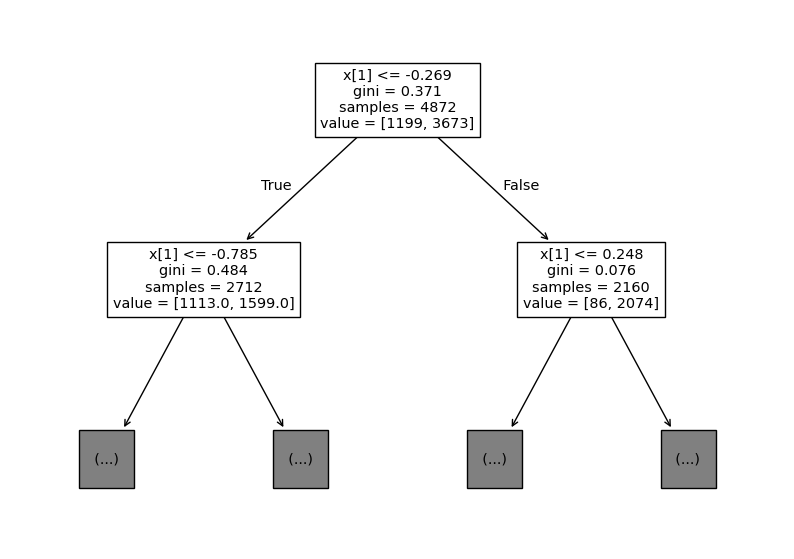

In [32]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth=1) #max_depth가 height를 자르는 그런...조건이겠죠?
plt.show()